In [3]:
# import modules 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import geopandas as gpd 
from collections import Counter 
# import pyreadstat
%matplotlib inline

In [ ]:
output = '../Output/'

# 1. First-data 

In [3]:
# read the data 
data_one = pd.read_excel('../Data/First-Data/1-deathpermonth.xlsx')
data_one.rename({"202may": '2020may'}, axis =1, inplace = True)
data_one.shape

(411, 17)

In [4]:
# read the data 
data_two = pd.read_csv('../Data/First-Data/new_death_month_2020_pop.csv', sep = ";", index_col = 'NUTS_ID')
data_two.rename({"202may": "2020may"}, axis = 1, inplace = True)
data_two.shape

(411, 35)

In [5]:
# read the data 
data_three = pd.read_csv('../Data/First-Data/new_death_2021_pop.csv', sep = ";", index_col = 'NUTS_ID')
data_three.shape

(411, 16)

## Shape files

In [4]:
shape = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level2.shp')

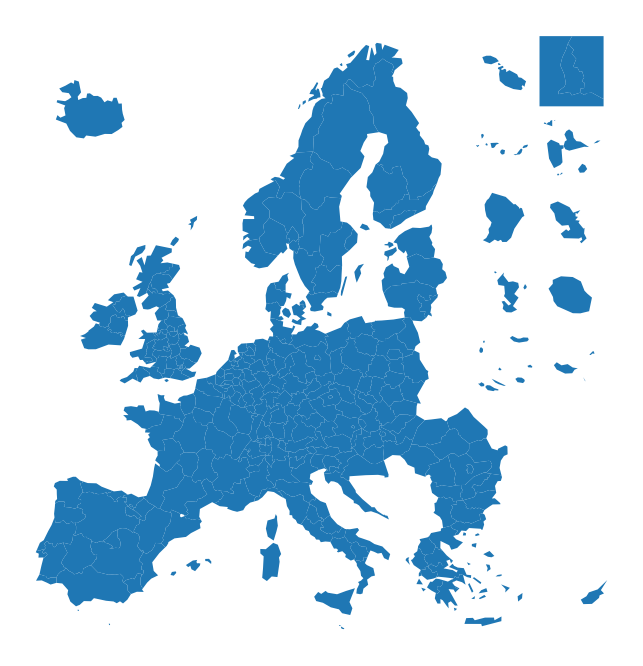

In [5]:
shape.plot(figsize = (15, 12))
plt.axis('off');

In [15]:
covid = gpd.read_file('../Data/First-Data/NUTS_COVID.shp')
covid

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,geometry
0,BG423,3,BG,ÐÐ°Ð·Ð°ÑÐ´Ð¶Ð¸Ðº,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((24.42101 42.55306, 24.41032 42.46950..."
1,BG424,3,BG,Ð¡Ð¼Ð¾Ð»ÑÐ½,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((25.07422 41.79348, 25.05851 41.75177..."
2,BG425,3,BG,ÐÑÑÐ´Ð¶Ð°Ð»Ð¸,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((25.94863 41.32034, 25.90644 41.30757..."
3,CH011,3,CH,Vaud,0.0,0.0,0.0,0.0,0.0,0.0,...,424.0,424.0,424.0,424.0,425.0,425.0,427.0,429.0,429.0,"MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9..."
4,CH012,3,CH,Valais,0.0,0.0,0.0,0.0,0.0,0.0,...,153.0,153.0,153.0,153.0,153.0,153.0,154.0,154.0,154.0,"POLYGON ((8.47767 46.52760, 8.39953 46.48872, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,RS,0,RS,Srbija/Ð¡pÐ±Ð¸ÑÐ°,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((19.69810 46.18793, 19.79780 46.13588..."
2000,CZ,0,CZ,Äesko,0.0,0.0,0.0,0.0,0.0,0.0,...,352.0,352.0,358.0,368.0,382.0,389.0,394.0,411.0,419.0,"POLYGON ((14.31787 51.05470, 14.41509 51.02507..."
2001,EE,0,EE,Eesti,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,64.0,"MULTIPOLYGON (((25.83016 59.56406, 25.88224 59..."
2002,HU,0,HU,MagyarorszÃ¡g,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,593.0,595.0,596.0,596.0,602.0,607.0,611.0,614.0,"POLYGON ((22.12108 48.37831, 22.15531 48.40340..."


<AxesSubplot:>

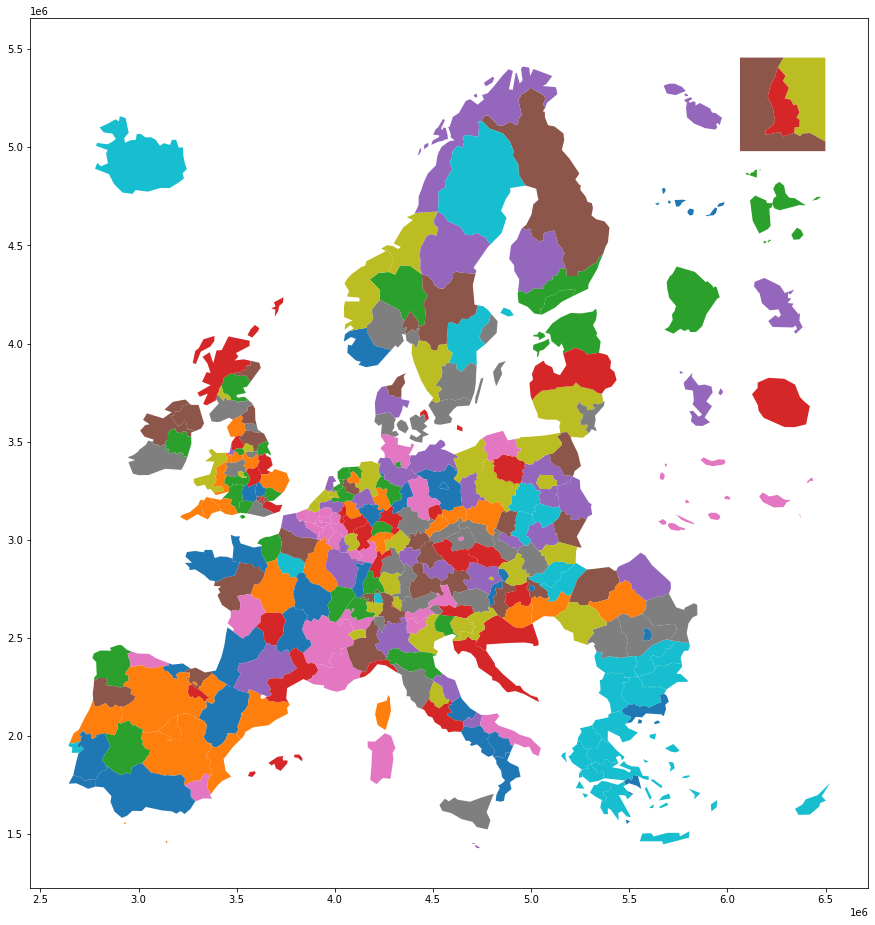

In [14]:
shape.plot(figsize = (20,16), column = 'name')

(30.0, 75.0)

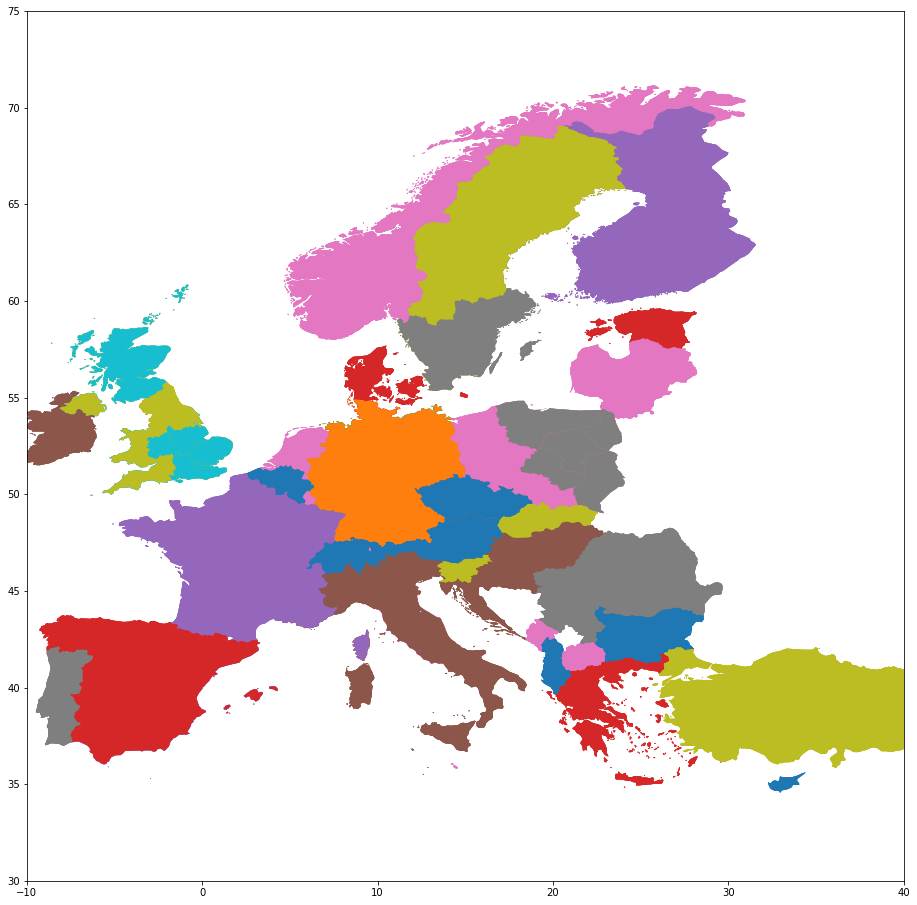

In [16]:
covid.plot(figsize = (20,16), column = 'NUTS_ID' )
plt.xlim(-10, 40)
plt.ylim(30, 75)

In [10]:
# save the two shape files 
# Global-EU
covid.to_csv(output + "shape.shp")
# Regional EU
shape.to_csv(output + "EU-focus.shp")

## Normal death 

In [17]:
needed_col = [ '2020-January',
'2020-February',
'2020-March',
'2020-April',
'2020-May',
'2020-June',
'2020-July',
'2020-August',
'2020-September',
'2020-October',
'2020-November',
'2020-December',
'2021-January',
'2021-February',
'2021-March',
'2021-April']

In [19]:
normal_death = data_two.iloc[:,:16]
normal_death.fillna(0, inplace= True)
normal_death.columns =  [ '2020-January',
'2020-February',
'2020-March',
'2020-April',
'2020-May',
'2020-June',
'2020-July',
'2020-August',
'2020-September',
'2020-October',
'2020-November',
'2020-December',
'2021-January',
'2021-February',
'2021-March',
'2021-April']
# output the file 
# normal_death.to_csv(output + 'Normal_deaths.csv')

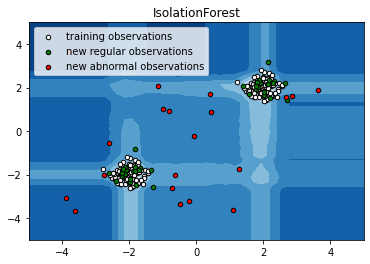

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [13]:
lof = LocalOutlierFactor()

In [8]:
clf = IsolationForest(random_state=np.random.RandomState(42))


In [33]:
clf.decision_function(normal_death)

array([ 0.05992991,  0.18191725,  0.18028241,  0.17672274,  0.1821542 ,
        0.17302987,  0.17103728,  0.182966  ,  0.18078177,  0.18107668,
       -0.07189711,  0.14197133,  0.01933191,  0.04808638, -0.10524842,
        0.00800468,  0.1814255 ,  0.18037049,  0.17397931,  0.17739318,
        0.16450903,  0.17974444,  0.18244897,  0.17504377,  0.17038238,
        0.1773585 ,  0.1781568 ,  0.16969197,  0.17663762,  0.17753556,
        0.18330713,  0.16908829,  0.16836393,  0.18058444,  0.18259824,
        0.18453964,  0.1741827 ,  0.17861004,  0.17111356,  0.17032935,
        0.17273432,  0.17830681,  0.17990652, -0.12771213,  0.14072214,
        0.13168862,  0.16535146,  0.15457495,  0.15998807,  0.14269928,
        0.17620599,  0.16288165,  0.17812212,  0.17051113,  0.13998348,
        0.17336059,  0.17157048,  0.14114907, -0.23373706, -0.13192974,
       -0.16804627,  0.10665373,  0.09228459,  0.16139222,  0.1188792 ,
       -0.02293722,  0.1674223 ,  0.01006078, -0.17735804,  0.09

In [44]:
d = clf.predict(normal_death)

In [51]:
normal_death['Type'] = d 
normal_death

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April,Type
NUTS_ID,,,,,,,,,,,,,,,,,
AT,0.0,0.0,21,31,6,5,3,2,5,46,112,122,64,39,29,0.0,1
AT11,0.0,0.0,1,1,1,0,0,0,0,3,9,6,3,2,4,0.0,1
AT12,0.0,0.0,3,7,2,1,1,1,2,11,19,21,13,7,6,0.0,1
AT13,0.0,0.0,7,10,4,4,1,1,4,8,17,26,21,13,12,0.0,1
AT21,0.0,0.0,2,2,1,0,0,0,0,4,19,17,12,5,5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKM92,0.0,0.0,2,3,2,0,0,0,1,3,2,1,6,3,1,0.0,1
UKM93,0.0,0.0,2,5,3,2,1,0,1,3,4,4,6,5,2,1.0,1
UKM94,0.0,0.0,2,4,2,1,0,0,0,1,5,3,3,3,1,1.0,1


In [16]:
d = pd.merge(normal_death, covid, left_on = normal_death.index, right_on = 'NUTS_ID')

NameError: name 'normal_death' is not defined

In [61]:
d = gpd.GeoDataFrame(d)

In [4]:
ds = pd.read_stata('../Data/COVID19-European-Regional-Tracker/04_master/EUROPE_COVID19_master.dta')

In [ ]:
# One 

# Two 

# Three 

In [102]:
aus = ds.query('country == "Austria"').pivot_table(index = 'nuts_id', columns = 'date', values = 'cases')

In [110]:
clf = clf.fit(np.array(aus))

In [115]:
anamoly = clf.predict(np.array(aus))
score = clf.decision_function(np.array(aus))

In [120]:
aus['anomaly'] = anamoly
aus['score'] = score

In [125]:
m = pd.merge(aus, covid, left_on = aus.index, right_on = 'NUTS_ID')

In [127]:
m = gpd.GeoDataFrame(m)

In [5]:
q = ds.pivot_table(index = 'nuts_id', columns = 'date', values = 'cases_daily')
q.fillna(value = 0, inplace = True)

In [6]:
q

date,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-20,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
nuts_id,,,,,,,,,,,,,,,,,,,,,
AT111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,7.0,0.0,11.0,16.0,16.0,24.0,8.0,0.0,0.0
AT112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.0,17.0,55.0,64.0,68.0,88.0,74.0,53.0,0.0,0.0
AT113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,32.0,7.0,40.0,21.0,44.0,40.0,16.0,0.0,0.0
AT121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,214.0,236.0,245.0,319.0,388.0,374.0,312.0,358.0,0.0,0.0
AT122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119.0,103.0,130.0,144.0,134.0,195.0,205.0,211.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKM91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,37.0,70.0,46.0,62.0,76.0,72.0,3.0,0.0,0.0
UKM92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,43.0,92.0,66.0,76.0,60.0,66.0,4.0,0.0,0.0
UKM93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,41.0,67.0,86.0,68.0,76.0,76.0,2.0,0.0,0.0


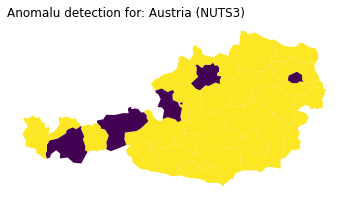

In [134]:
m.plot(column = 'anomaly')
plt.title('Anomalu detection for: Austria (NUTS3)', loc = 'left')
plt.axis('off')
plt.show()

In [9]:
clf.fit(np.array(q))

IsolationForest(random_state=RandomState(MT19937) at 0x1B09A5E9140)

In [10]:
a = lof.fit_predict(np.array(q))

NameError: name 'lof' is not defined

In [18]:
q['cof'] = a

In [11]:
clf.fit(np.array(q))

IsolationForest(random_state=RandomState(MT19937) at 0x1B09A5E9140)

In [12]:
ano = clf.predict(np.array(q))
score = clf.decision_function(np.array(q))

In [13]:
q['ano'] = ano 
q['score'] = score

In [17]:
v = pd.merge(covid, q, left_on = 'NUTS_ID', right_on = q.index)

In [18]:
v = gpd.GeoDataFrame(v)

In [19]:
v.query('ano == -1').loc[:, ['CNTR_CODE', 'NUTS_NAME']].sample(10)

,CNTR_CODE,NUTS_NAME
714,FR,RhÃ´ne
1058,UK,Tyneside
590,FR,Val-dâOise
712,FR,IsÃ¨re
56,BE,Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad
532,ES,Sevilla
11,CH,ZÃ¼rich
721,FR,Var
345,CZ,MoravskoslezskÃ½ kraj
754,IT,Torino


In [26]:
import cartopy.crs as ccrs

In [27]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world['name'] != 'Antarctica']
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

(-15.0, 42.0, 30.0, 72.0)

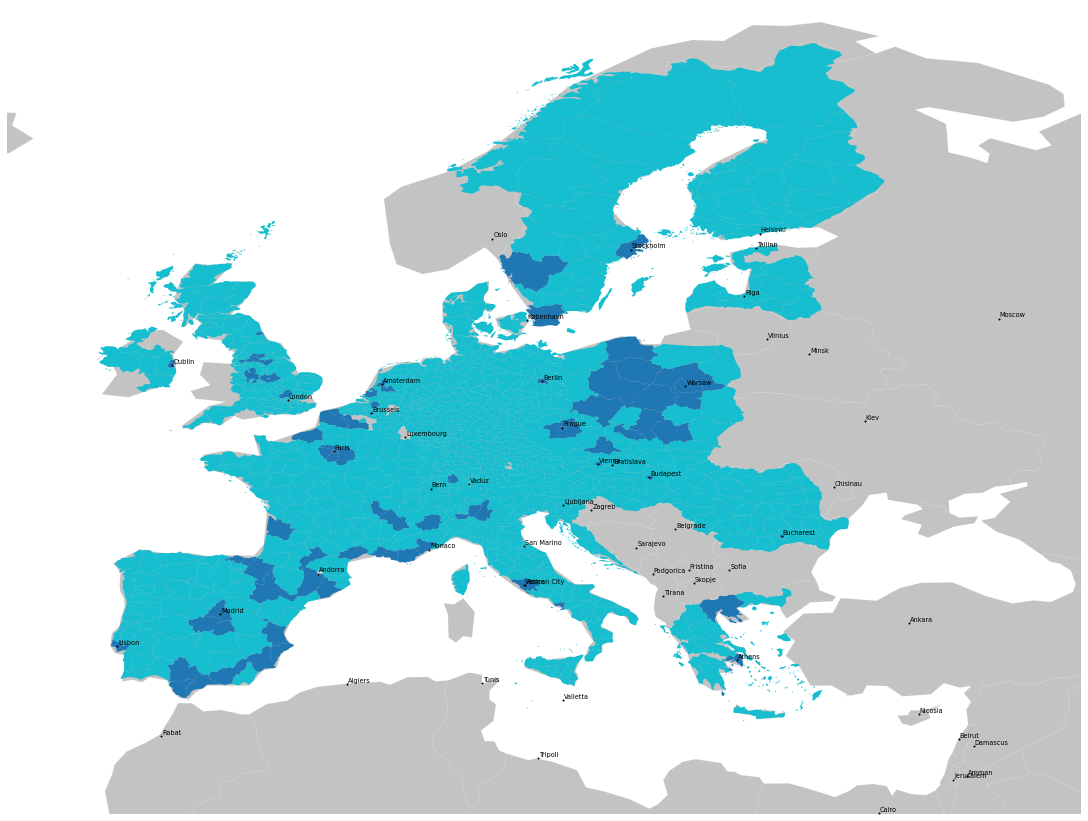

In [28]:
# create the map 

fig, ax = plt.subplots(figsize = (15,12), constrained_layout = True)
world.plot(color = '#696969', ax = ax, edgecolor = 'w', linewidth = 0.2, alpha = 0.4)
v.plot(column = 'ano', ax =ax, categorical = True)
plt.xlim(-15, 42), plt.ylim(30, 72)
cities.plot(ax = ax, color = 'k', markersize = 1)
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(1, 2), textcoords="offset points", fontsize = 6.5)
plt.axis('off')
# plt.savefig('../Figures/Fig.2.png')

In [336]:
v

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,3,4,5,6,7,8,...,2021-10-26 00:00:00,2021-10-27 00:00:00,2021-10-28 00:00:00,2021-10-29 00:00:00,2021-10-30 00:00:00,2021-10-31 00:00:00,2021-11-01 00:00:00,cof,ano,score
0,CH011,3,CH,Vaud,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.024874
1,CH012,3,CH,Valais,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,36.0,0.0,0.0,0.0,0.0,0.0,1,1,0.147007
2,CH013,3,CH,GenÃ¨ve,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,85.0,0.0,0.0,0.0,0.0,0.0,1,1,0.051042
3,CH021,3,CH,Bern,0.0,0.0,0.0,0.0,0.0,0.0,...,171.0,202.0,0.0,0.0,0.0,0.0,0.0,1,1,0.097077
4,CH022,3,CH,Freiburg,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,1,0.145842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,PL82,2,PL,Podkarpackie,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,428.0,356.0,378.0,0.0,0.0,0.0,1,1,0.013608
1162,PL84,2,PL,Podlaskie,0.0,0.0,0.0,0.0,0.0,0.0,...,572.0,804.0,755.0,761.0,0.0,0.0,0.0,1,1,0.079407
1163,PL91,2,PL,Warszawski stoÅeczny,NaN,NaN,NaN,NaN,NaN,NaN,...,1130.0,1687.0,1673.0,2037.0,0.0,0.0,0.0,-1,-1,-0.191291
1164,PL92,2,PL,Mazowiecki regionalny,0.0,0.0,0.0,0.0,0.0,0.0,...,1130.0,1687.0,1673.0,2037.0,0.0,0.0,0.0,-1,-1,-0.191291


In [149]:
ds.groupby(ds['date'].dt.strftime('%B'))['cases']

In [183]:
d = out['Austria'].to_frame()
d['country'] = 'Austria'

In [187]:
d.index

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [214]:
out

dict_keys(['Austria', 'Belgium', 'Switzerland', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovak Republic', 'England (UK)', 'Scotland (UK)'])

In [170]:
out = {}

for country in ds.country.unique():
    print(country)
    out[country] = ds[ds['country'] == country].groupby(pd.Grouper(key='date', freq='1M')).sum()['cases']

Austria
Belgium
Switzerland
Czechia
Germany
Denmark
Estonia
Greece
Spain
Finland
France
Croatia
Hungary
Ireland
Italy
Latvia
Netherlands
Norway
Poland
Portugal
Romania
Sweden
Slovenia
Slovak Republic
England (UK)
Scotland (UK)


In [236]:
n = pd.DataFrame(out).reset_index()

In [240]:
final = n.melt('date', var_name='Country', value_name='Deaths')
final

,date,Country,Deaths
0,2020-01-31,Austria,NaN
1,2020-02-29,Austria,19.0
2,2020-03-31,Austria,91761.0
3,2020-04-30,Austria,422778.0
4,2020-05-31,Austria,500077.0
...,...,...,...
593,2021-07-31,Scotland (UK),10030332.0
594,2021-08-31,Scotland (UK),11779506.0
595,2021-09-30,Scotland (UK),15631467.0
596,2021-10-31,Scotland (UK),18235835.0


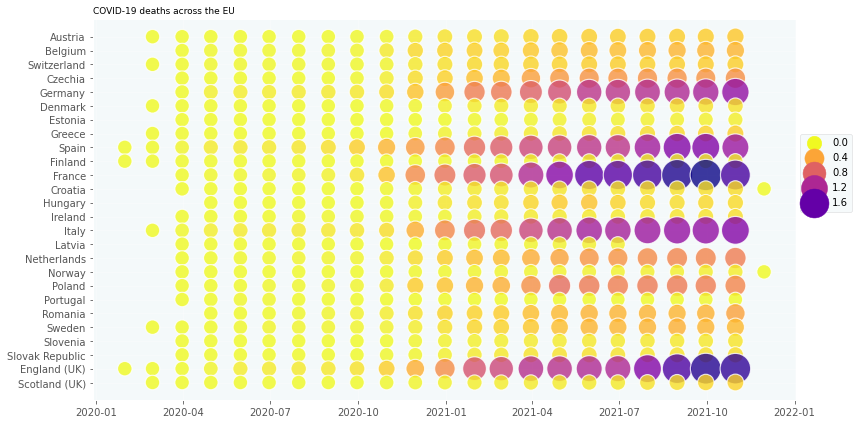

In [329]:
fig = plt.figure(figsize = (12, 6))
g = sns.scatterplot(x = 'date', y = 'Country', data = final, size = 'Deaths', sizes = (210, 980),
                alpha = .8, hue = 'Deaths', palette = 'plasma_r')
plt.xlabel(''), plt.ylabel('')
plt.title('COVID-19 deaths across the EU', loc = 'left', fontweight = 'light', fontsize = 9)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.08, 0.7),
           borderaxespad=0)
plt.tight_layout()
plt.savefig('../Figures/Fig.01.png')

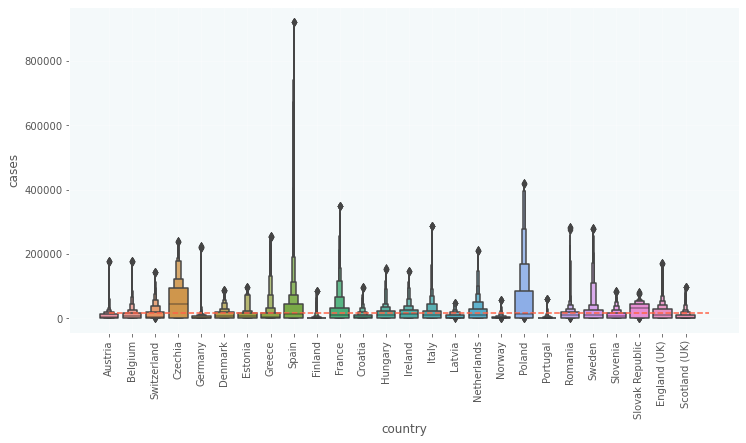

In [130]:
fig = plt.figure(figsize = (12, 6))
sns.boxenplot(x = 'country', y = 'cases', data = ds)
plt.hlines(y = np.mean(ds['cases']), xmin = 0, xmax = 26, linestyle = '--', color = 'tomato')
plt.ylim()
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

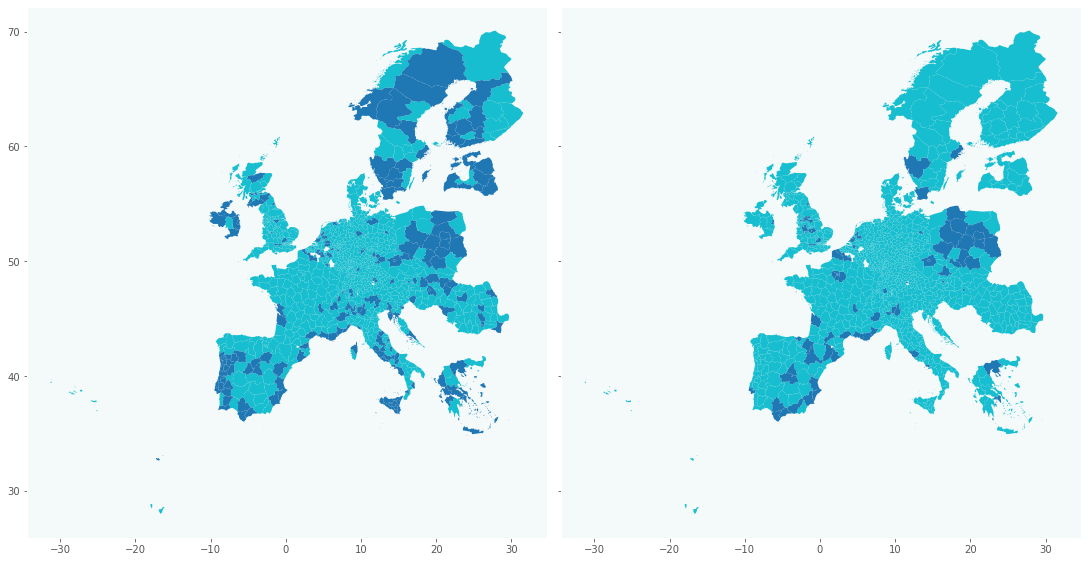

In [90]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

fig, ax = plt.subplots(1,2, figsize = (15, 13), constrained_layout = True, sharey = True)
v.plot(column = 'cof', legend = False, categorical = True, ax =ax[0])
v.plot(column = 'ano', legend = False, categorical = True, ax =ax[1])
plt.show()

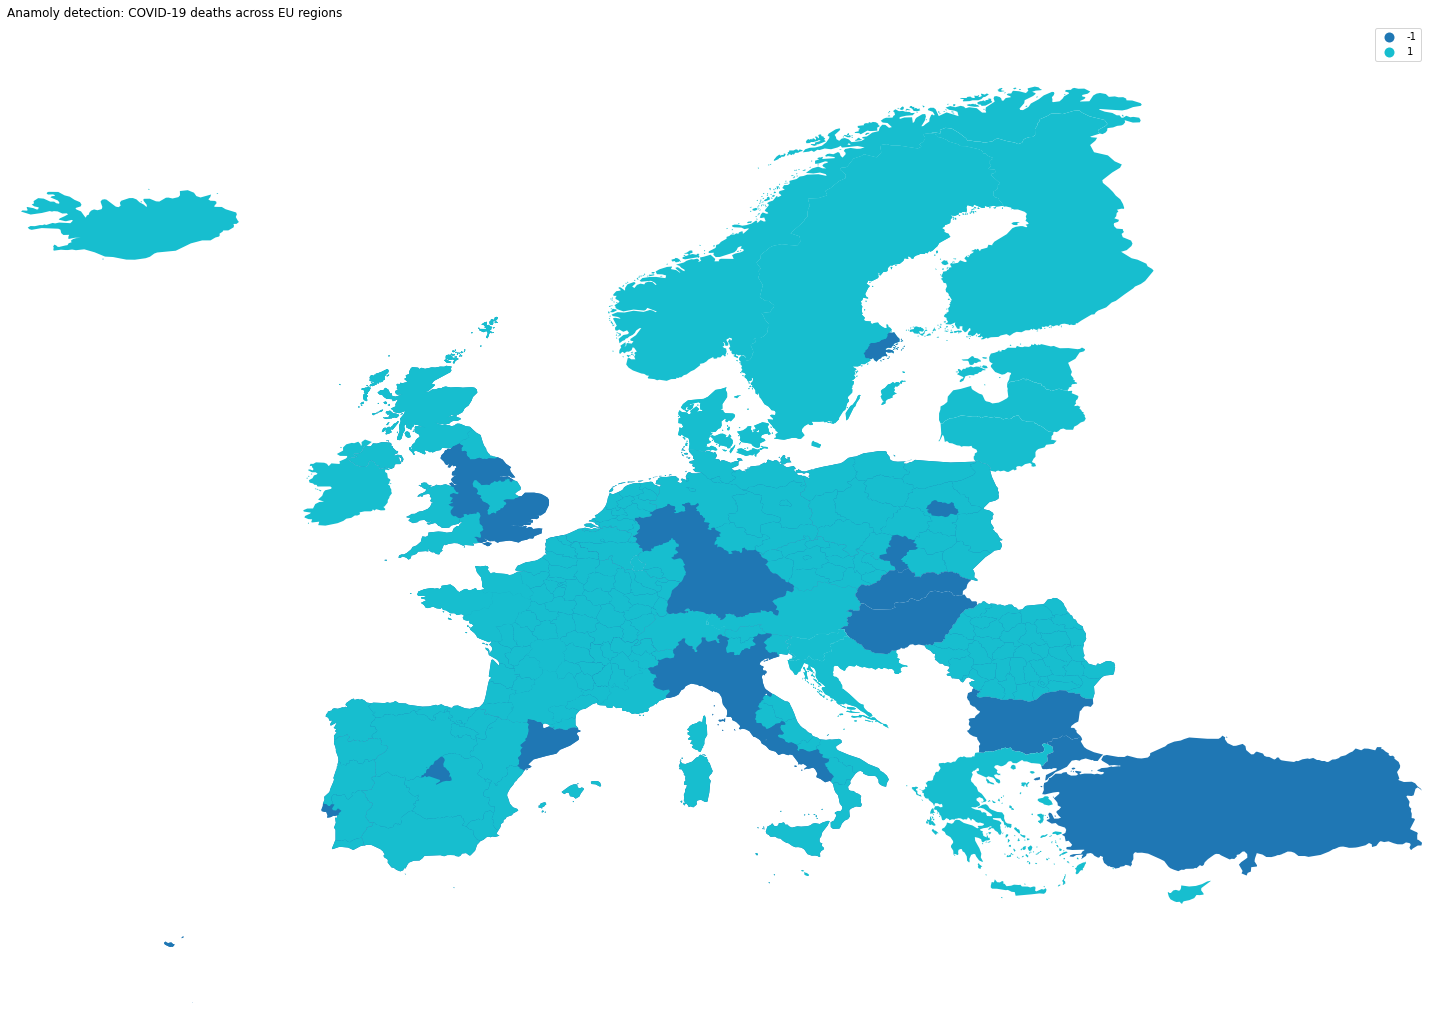

In [136]:
d.plot(figsize = (20, 15), column = 'Type', legend = True, categorical = True)
plt.xlim([-25, 45])
plt.ylim([30, 74])
plt.axis('off')
plt.title('Anamoly detection: COVID-19 deaths across EU regions', loc = 'left', fontweight = 'light')
plt.tight_layout()
plt.show()

In [22]:
normal_death

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
NUTS_ID,,,,,,,,,,,,,,,,
AT,0.0,0.0,21,31,6,5,3,2,5,46,112,122,64,39,29,0.0
AT11,0.0,0.0,1,1,1,0,0,0,0,3,9,6,3,2,4,0.0
AT12,0.0,0.0,3,7,2,1,1,1,2,11,19,21,13,7,6,0.0
AT13,0.0,0.0,7,10,4,4,1,1,4,8,17,26,21,13,12,0.0
AT21,0.0,0.0,2,2,1,0,0,0,0,4,19,17,12,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKM92,0.0,0.0,2,3,2,0,0,0,1,3,2,1,6,3,1,0.0
UKM93,0.0,0.0,2,5,3,2,1,0,1,3,4,4,6,5,2,1.0
UKM94,0.0,0.0,2,4,2,1,0,0,0,1,5,3,3,3,1,1.0


Let's turn the columns into a datatime type format.

In [17]:
data_one.columns = ['NUTS_ID', '2020-January',
'2020-February',
'2020-March',
'2020-April',
'2020-May',
'2020-June',
'2020-July',
'2020-August',
'2020-September',
'2020-October',
'2020-November',
'2020-December',
'2021-January',
'2021-February',
'2021-March',
'2021-April',]

# 2. Second data 

In [18]:
import patoolib 
patoolib.extract_archive('../Data/Third-Data/ESPON1.rar')
patoolib.extract_archive('../Data/Third-Data/ESPON2.rar')
patoolib.extract_archive('../Data/Third-Data/ESPON2_large.rar')

ModuleNotFoundError: No module named 'patoolib'

In [9]:
ESPON1 = gpd.read_file('ESPON 1/ESPON1.shp')
ESPON2 = gpd.read_file('ESPON 2/ESPON2.shp')
ESPON2large = gpd.read_file('ESPON2_large/ESPON2_large.shp')

In [13]:
ESPON1.columns

Index(['POLY_ID', 'OBJECTID_1', 'OBJECTID_2', 'OBJECTID', 'LEVL_CODE',
       'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE',
       'COAST_TYPE', 'FID_1', 'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'Death_9', 'Death_14', 'Death_18', 'Death_22', 'Death_27',
       'Death_31', 'Death_36', 'VAR_nbinte', 'VAR_nburba', 'VAR_nbrura',
       'Urbrural', 'povert', 'migrat', 'unempl', 'POP201', 'lifeex', 'GDP',
       'EDUC', 'BEDS', 'POP65', 'PovIndex', 'GOV', 'EQI_10', 'EQI_17',
       'EQI_EV', 'PASS_F2', 'Dens', 'Lndens', 'geometry'],
      dtype='object')

In [16]:
ESPON2large.shape

(360, 74)

In [17]:
ESPON2large.to_file(output + 'ESPON2.shp')

In [25]:
ESPON1.columns

Index(['POLY_ID', 'OBJECTID_1', 'OBJECTID_2', 'OBJECTID', 'LEVL_CODE',
       'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE',
       'COAST_TYPE', 'FID_1', 'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'Death_9', 'Death_14', 'Death_18', 'Death_22', 'Death_27',
       'Death_31', 'Death_36', 'VAR_nbinte', 'VAR_nburba', 'VAR_nbrura',
       'Urbrural', 'povert', 'migrat', 'unempl', 'POP201', 'lifeex', 'GDP',
       'EDUC', 'BEDS', 'POP65', 'PovIndex', 'GOV', 'EQI_10', 'EQI_17',
       'EQI_EV', 'PASS_F2', 'Dens', 'Lndens', 'geometry'],
      dtype='object')

<AxesSubplot:>

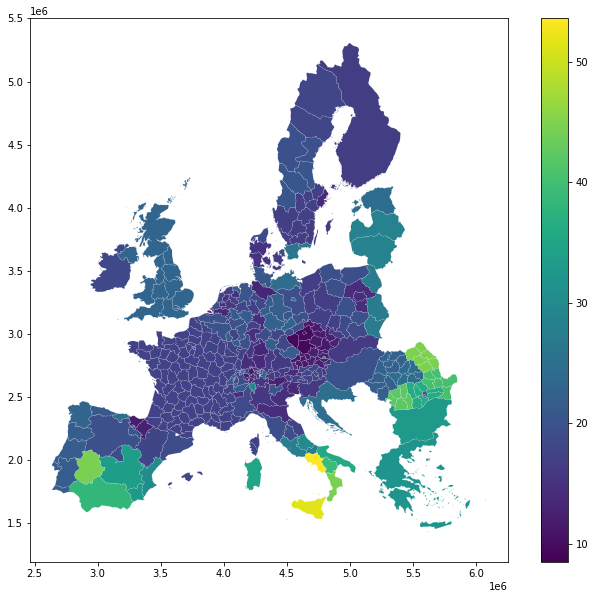

In [32]:
ESPON1.plot(column = 'povert', figsize = (12,10), legend = True, edgecolor = 'white', linewidth = .1)

In [33]:
ESPON2.columns

Index(['POLY_ID', 'OBJECTID', 'LEVL_CODE', 'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID_1', 'Shape_Leng',
       'Shape_Area', 'CovY1S3', 'CovY1S4', 'CovY1S5', 'CovY1S6', 'CovY1S7',
       'CovY1S8', 'CovY1S9', 'CovY1S10', 'CovY1S11', 'CovY1S12', 'CovY1S13',
       'CovY1S14', 'CovY1S15', 'CovY1S16', 'CovY1S17', 'CovY1S18', 'CovY1S19',
       'CovY1S20', 'CovY1S21', 'CovY1S22', 'CovY1S23', 'CovY1S24', 'CovY1S25',
       'CovY1S26', 'CovY1S27', 'CovY1S28', 'CovY1S29', 'CovY1S30', 'CovY1S31',
       'CovY1S32', 'CovY1S33', 'CovY1S34', 'CovY1S35', 'CovY1S36', 'CovY1S37',
       'CovY1S38', 'CovY1S39', 'CovY1S40', 'CovY1S41', 'CovY1S42', 'CovY1S43',
       'CovY1S44', 'CovY1S45', 'CovY1S46', 'CovY1S47', 'CovY1S48', 'CovY1S49',
       'CovY1S50', 'CovY1S51', 'CovY1S52', 'CovY1S53', 'CovY2S1', 'CovY2S2',
       'CovY2S3', 'CovY2S4', 'CovY2S5', 'CovY2S6', 'CovY2S7', 'CovY2S8',
       'CovY2S9', 'Povert', 'Migrat', 'Unempl', 'POP', 'Lifeex', 'Beds',

In [34]:
col = ['NUTS_ID', 'CovY1S3', 'CovY1S4', 'CovY1S5', 'CovY1S6', 'CovY1S7',
       'CovY1S8', 'CovY1S9', 'CovY1S10', 'CovY1S11', 'CovY1S12', 'CovY1S13',
       'CovY1S14', 'CovY1S15', 'CovY1S16', 'CovY1S17', 'CovY1S18', 'CovY1S19',
       'CovY1S20', 'CovY1S21', 'CovY1S22', 'CovY1S23', 'CovY1S24', 'CovY1S25',
       'CovY1S26', 'CovY1S27', 'CovY1S28', 'CovY1S29', 'CovY1S30', 'CovY1S31',
       'CovY1S32', 'CovY1S33', 'CovY1S34', 'CovY1S35', 'CovY1S36', 'CovY1S37',
       'CovY1S38', 'CovY1S39', 'CovY1S40', 'CovY1S41', 'CovY1S42', 'CovY1S43',
       'CovY1S44', 'CovY1S45', 'CovY1S46', 'CovY1S47', 'CovY1S48', 'CovY1S49',
       'CovY1S50', 'CovY1S51', 'CovY1S52', 'CovY1S53', 'CovY2S1', 'CovY2S2',
       'CovY2S3', 'CovY2S4', 'CovY2S5', 'CovY2S6', 'CovY2S7', 'CovY2S8',
       'CovY2S9']

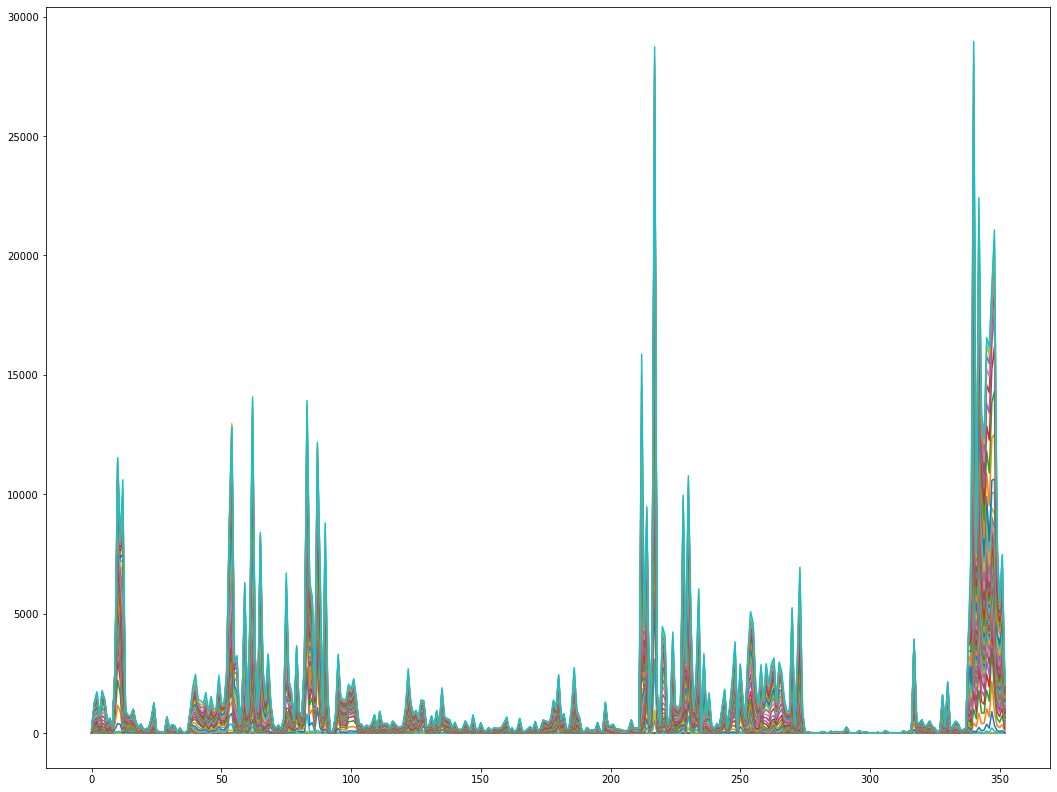

In [58]:
fig, ax = plt.subplots(figsize = (18, 14))
for col in ESPON2.loc[:,'CovY1S3': 'CovY2S9'].columns:
    ESPON2.loc[:,'CovY1S3': 'CovY2S9'][col].plot()

In [49]:
ESPON1.columns

Index(['POLY_ID', 'OBJECTID_1', 'OBJECTID_2', 'OBJECTID', 'LEVL_CODE',
       'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE',
       'COAST_TYPE', 'FID_1', 'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'Death_9', 'Death_14', 'Death_18', 'Death_22', 'Death_27',
       'Death_31', 'Death_36', 'VAR_nbinte', 'VAR_nburba', 'VAR_nbrura',
       'Urbrural', 'povert', 'migrat', 'unempl', 'POP201', 'lifeex', 'GDP',
       'EDUC', 'BEDS', 'POP65', 'PovIndex', 'GOV', 'EQI_10', 'EQI_17',
       'EQI_EV', 'PASS_F2', 'Dens', 'Lndens', 'geometry'],
      dtype='object')

In [43]:
ESPON2

,POLY_ID,OBJECTID,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID_1,...,POP,Lifeex,Beds,POP65,GOV,Density,Urbrural,Educ,Gdp,geometry
0,1,1,2,AT11,AT,Burgenland,0,0,0,AT11,...,294436.0,81.9,604.670000,22.240827,1.406186,77.8,rural,0.300,8353.780000,"POLYGON ((4846490.000 2803511.000, 4848104.000..."
1,2,2,2,AT12,AT,None,0,0,0,AT12,...,1684287.0,81.7,673.910000,20.295769,1.344852,88.9,rural,0.300,55691.140000,"POLYGON ((4726984.000 2881333.000, 4742889.000..."
2,3,3,2,AT13,AT,Wien,0,0,0,AT13,...,1911191.0,81.1,756.470000,16.507508,1.349665,4808.9,intermed,0.400,91564.190000,"POLYGON ((4810026.000 2802881.000, 4803838.000..."
3,4,4,2,AT21,AT,None,0,0,0,AT21,...,561293.0,82.2,818.840000,22.068331,1.381169,59.9,rural,0.300,19120.630000,"POLYGON ((4575783.000 2670627.000, 4600623.000..."
4,5,5,2,AT22,AT,Steiermark,0,0,0,AT22,...,1246395.0,82.2,815.220000,20.501446,1.313469,76.6,rural,0.300,45486.070000,"POLYGON ((4760797.000 2734594.000, 4776671.000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,358,1,UKJ,UK,SOUTH EAST (ENGLAND),0,0,0,UKJ,...,9175033.0,82.6,159.530761,19.393000,1.353626,479.6,urbain,0.492,361142.000000,"MULTIPOLYGON (((3591887.000 3260001.000, 35882..."
349,350,359,1,UKK,UK,SOUTH WEST (ENGLAND),0,0,0,UKK,...,5616381.0,82.2,176.554974,22.095000,1.355456,234.8,urbain,0.436,178373.000000,"MULTIPOLYGON (((3523552.000 3272636.000, 35245..."
350,351,360,1,UKL,UK,WALES,0,0,0,UKL,...,3136383.0,80.4,336.757341,21.051000,1.293532,151.0,intermed,0.410,83779.898438,"MULTIPOLYGON (((3436880.000 3442236.000, 34481..."
351,352,361,1,UKM,UK,SCOTLAND,0,0,0,UKM,...,5454238.0,79.3,376.826240,18.978000,1.396044,138.7,urbain,0.504,182897.000000,"MULTIPOLYGON (((3461377.000 3908521.000, 34758..."


<AxesSubplot:>

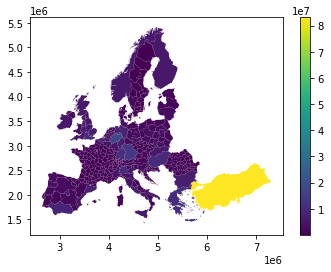

In [42]:
ESPON2.plot(column = 'POP', legend = True)

<AxesSubplot:>

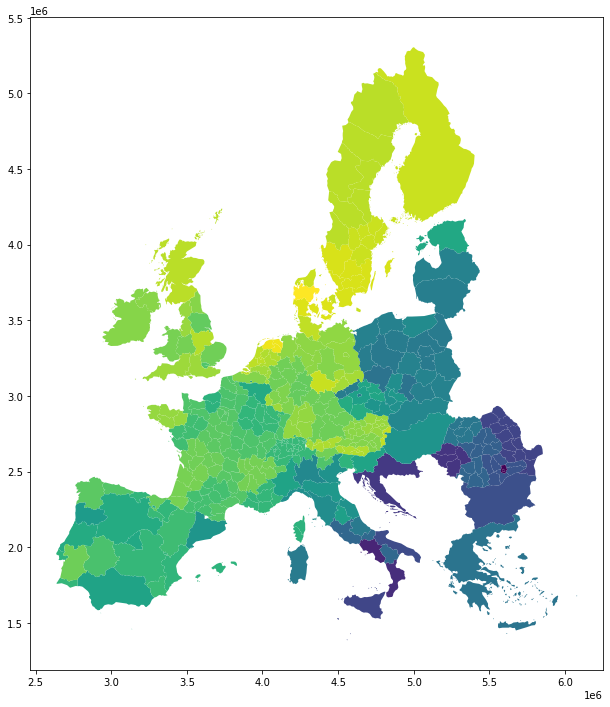

In [35]:
ESPON1.plot(column = 'GOV', figsize = (18,12))

In [36]:
ESPON2[col]

,NUTS_ID,CovY1S3,CovY1S4,CovY1S5,CovY1S6,CovY1S7,CovY1S8,CovY1S9,CovY1S10,CovY1S11,...,CovY1S53,CovY2S1,CovY2S2,CovY2S3,CovY2S4,CovY2S5,CovY2S6,CovY2S7,CovY2S8,CovY2S9
0,AT11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,174.0,181.0,189.0,200.0,210.0,215.0,219.0,226.0,228.0,234.0
1,AT12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,904.0,1000.0,1067.0,1116.0,1153.0,1183.0,1209.0,1232.0,1267.0,1290.0
2,AT13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1130.0,1236.0,1321.0,1416.0,1500.0,1571.0,1623.0,1663.0,1703.0,1735.0
3,AT21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,530.0,574.0,616.0,642.0,661.0,685.0,695.0,700.0,708.0,717.0
4,AT22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1384.0,1460.0,1520.0,1562.0,1612.0,1647.0,1690.0,1725.0,1755.0,1782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,UKJ,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,...,10648.0,12511.0,14331.0,16178.0,17684.0,18743.0,19558.0,20207.0,20689.0,21073.0
349,UKK,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,...,4232.0,4725.0,5304.0,6016.0,6703.0,7197.0,7563.0,7866.0,8095.0,8253.0
350,UKL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3709.0,4139.0,4446.0,4693.0,4894.0,5073.0,5209.0,5311.0,5392.0,5447.0
351,UKM,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,...,4884.0,5311.0,5695.0,6141.0,6501.0,6803.0,7069.0,7281.0,7399.0,7485.0


In [46]:
ESPON2large.shape, ESPON2.shape, ESPON1.shape

((360, 74), (353, 85), (377, 45))

In [47]:
covid.shape

(2004, 39)

In [48]:
print(ESPON1.columns)
print(ESPON1.shape)

print('-----------------')

print(ESPON2.columns)
print(ESPON2large.shape)

print('-----------------')

print(ESPON2large.columns)
print(ESPON2large.shape)

Index(['POLY_ID', 'OBJECTID_1', 'OBJECTID_2', 'OBJECTID', 'LEVL_CODE',
       'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE',
       'COAST_TYPE', 'FID_1', 'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'Death_9', 'Death_14', 'Death_18', 'Death_22', 'Death_27',
       'Death_31', 'Death_36', 'VAR_nbinte', 'VAR_nburba', 'VAR_nbrura',
       'Urbrural', 'povert', 'migrat', 'unempl', 'POP201', 'lifeex', 'GDP',
       'EDUC', 'BEDS', 'POP65', 'PovIndex', 'GOV', 'EQI_10', 'EQI_17',
       'EQI_EV', 'PASS_F2', 'Dens', 'Lndens', 'geometry'],
      dtype='object')
(377, 45)
-----------------
Index(['POLY_ID', 'OBJECTID', 'LEVL_CODE', 'NUTS_ID', 'CNTR_CODE', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID_1', 'Shape_Leng',
       'Shape_Area', 'CovY1S3', 'CovY1S4', 'CovY1S5', 'CovY1S6', 'CovY1S7',
       'CovY1S8', 'CovY1S9', 'CovY1S10', 'CovY1S11', 'CovY1S12', 'CovY1S13',
       'CovY1S14', 'CovY1S15', 'CovY1S16', 'CovY1S17', 'CovY1S18', 'CovY1

In [49]:
ESPON1.to_csv(output + 'ESPON1.csv')

In [50]:
normal_death.index.tolist()

['AT',
 'AT11',
 'AT12',
 'AT13',
 'AT21',
 'AT22',
 'AT31',
 'AT32',
 'AT33',
 'AT34',
 'BE',
 'BE1',
 'BE2',
 'BE3',
 'BG',
 'CH',
 'CH011',
 'CH012',
 'CH013',
 'CH021',
 'CH022',
 'CH023',
 'CH024',
 'CH025',
 'CH031',
 'CH032',
 'CH033',
 'CH040',
 'CH051',
 'CH052',
 'CH053',
 'CH054',
 'CH055',
 'CH056',
 'CH057',
 'CH061',
 'CH062',
 'CH063',
 'CH064',
 'CH065',
 'CH066',
 'CH070',
 'CY',
 'CZ',
 'CZ010',
 'CZ020',
 'CZ031',
 'CZ032',
 'CZ041',
 'CZ042',
 'CZ051',
 'CZ052',
 'CZ053',
 'CZ063',
 'CZ064',
 'CZ071',
 'CZ072',
 'CZ080',
 'DE',
 'DE1',
 'DE2',
 'DE3',
 'DE4',
 'DE5',
 'DE6',
 'DE7',
 'DE8',
 'DE9',
 'DEA',
 'DEB',
 'DEC',
 'DED',
 'DEE',
 'DEF',
 'DEG',
 'DK',
 'DK01',
 'DK02',
 'DK03',
 'DK04',
 'DK05',
 'EE',
 'EL',
 'ES',
 'ES11',
 'ES12',
 'ES13',
 'ES21',
 'ES22',
 'ES23',
 'ES24',
 'ES30',
 'ES41',
 'ES42',
 'ES43',
 'ES51',
 'ES52',
 'ES53',
 'ES61',
 'ES62',
 'ES63',
 'ES64',
 'ES70',
 'FI',
 'FR',
 'FR10',
 'FR101',
 'FR102',
 'FR103',
 'FR104',
 'FR105',
 

In [51]:
ESPON1.drop('NUTS_NAME', axis = 1, inplace = True)
ESPON1.isna().sum()

POLY_ID       0
OBJECTID_1    0
OBJECTID_2    0
OBJECTID      0
LEVL_CODE     0
NUTS_ID       0
CNTR_CODE     0
MOUNT_TYPE    0
URBN_TYPE     0
COAST_TYPE    0
FID_1         0
Shape_Leng    0
Shape_Le_1    0
Shape_Le_2    0
Shape_Area    0
Death_9       0
Death_14      0
Death_18      0
Death_22      0
Death_27      0
Death_31      0
Death_36      0
VAR_nbinte    0
VAR_nburba    0
VAR_nbrura    0
Urbrural      0
povert        0
migrat        0
unempl        0
POP201        0
lifeex        0
GDP           0
EDUC          0
BEDS          0
POP65         0
PovIndex      0
GOV           0
EQI_10        0
EQI_17        0
EQI_EV        0
PASS_F2       0
Dens          0
Lndens        0
geometry      0
dtype: int64

In [52]:
ESPON1 = ESPON1.loc[:,'NUTS_ID':]

ESPON1.drop(['CNTR_CODE', 'FID_1', 'Shape_Le_1', 'Shape_Le_2',
       'Shape_Area', 'Death_9', 'Death_14', 'Death_18', 'Death_22', 'Death_27',
       'Death_31', 'Death_36'], axis = 1, inplace = True)

In [53]:
# ESPON22 = ESPON2.loc[:, 'NUTS_ID':]

# ESPON22.drop(['CovY1S3', 'CovY1S4',
#        'CovY1S5', 'CovY1S6', 'CovY1S7', 'CovY1S8', 'CovY1S9', 'CovY1S10',
#        'CovY1S11', 'CovY1S12', 'CovY1S13', 'CovY1S14', 'CovY1S15', 'CovY1S16',
#        'CovY1S17', 'CovY1S18', 'CovY1S19', 'CovY1S20', 'CovY1S21', 'CovY1S22',
#        'CovY1S23', 'CovY1S24', 'CovY1S25', 'CovY1S26', 'CovY1S27', 'CovY1S28',
#        'CovY1S29', 'CovY1S30', 'CovY1S31', 'CovY1S32', 'CovY1S33', 'CovY1S34',
#        'CovY1S35', 'CovY1S36', 'CovY1S37', 'CovY1S38', 'CovY1S39', 'CovY1S40',
#        'CovY1S41', 'CovY1S42', 'CovY1S43', 'CovY1S44', 'CovY1S45', 'CovY1S46',
#        'CovY1S47', 'CovY1S48', 'CovY1S49', 'CovY1S50', 'CovY1S51', 'CovY1S52',
#        'CovY1S53', 'CovY2S1', 'CovY2S2', 'CovY2S3', 'CovY2S4', 'CovY2S5',
#        'CovY2S6', 'CovY2S7', 'CovY2S8', 'CovY2S9'], axis = 1, inplace = True)

In [54]:
# add the total deaths
deaths = normal_death.copy()
deaths['total-death'] = np.sum(deaths, axis = 1)

In [55]:
cum_nor_death = (normal_death[needed_col]).cumsum(axis = 1)
cum_nor_death

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
NUTS_ID,,,,,,,,,,,,,,,,
AT,0.0,0.0,21.0,52.0,58.0,63.0,66.0,68.0,73.0,119.0,231.0,353.0,417.0,456.0,485.0,485.0
AT11,0.0,0.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,6.0,15.0,21.0,24.0,26.0,30.0,30.0
AT12,0.0,0.0,3.0,10.0,12.0,13.0,14.0,15.0,17.0,28.0,47.0,68.0,81.0,88.0,94.0,94.0
AT13,0.0,0.0,7.0,17.0,21.0,25.0,26.0,27.0,31.0,39.0,56.0,82.0,103.0,116.0,128.0,128.0
AT21,0.0,0.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,9.0,28.0,45.0,57.0,62.0,67.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKM92,0.0,0.0,2.0,5.0,7.0,7.0,7.0,7.0,8.0,11.0,13.0,14.0,20.0,23.0,24.0,24.0
UKM93,0.0,0.0,2.0,7.0,10.0,12.0,13.0,13.0,14.0,17.0,21.0,25.0,31.0,36.0,38.0,39.0
UKM94,0.0,0.0,2.0,6.0,8.0,9.0,9.0,9.0,9.0,10.0,15.0,18.0,21.0,24.0,25.0,26.0


In [56]:
norm_cum = pd.concat([normal_death.drop(needed_col, axis =1), cum_nor_death], axis =1)

In [57]:
norm_cum.to_csv(output + 'cumsum_normal_death.csv')

## 3. Third data 

In [1]:
import pyreadstat

In [2]:
# save the model to disk
sav1, meta = pyreadstat.read_sav("../Data/Last/round_1_lwc_20102020.sav", encoding= "UTF-8")
sav2, meta = pyreadstat.read_sav("../Data/Last/round_2_lwc_20102020.sav", encoding= "UTF-8")

In [5]:
sav1.shape

(68146, 219)

In [6]:
sav1.head(2)

,wave,w_gross_trim,CASE,LANGUAGE,STARTED,TIME_SUM,LASTDATA,FINISHED,LASTPAGE,B001,...,riskdepr,childcare_hours,lostjob_2,job_insec,hou_insec,child_in_hh,singleparent,stopped_work,entered_work,children
0,1.0,0.012496,663.0,5.0,2020-04-09 16:09:55,391.0,2020-04-09 16:16:26,1.0,28.0,14.0,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,4.0
1,1.0,0.012496,664.0,5.0,2020-04-09 16:13:50,714.0,2020-04-09 16:25:44,1.0,28.0,14.0,...,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,4.0


In [25]:
sav1.loc[:,'F018':'F020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68146 entries, 0 to 68145
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F018    4801 non-null   float64
 1   F019    721 non-null    float64
 2   F020    0 non-null      float64
dtypes: float64(3)
memory usage: 1.6 MB


In [ ]:
sav1['F020'].unique()

array([nan])

Same columns between sav1 & sav2

In [ ]:
len(set(sav1.columns.tolist()).difference(set²(sav2.columns.tolist())))

0

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:>

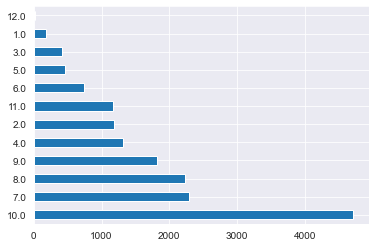

In [112]:
sav2['F236'].value_counts().plot(kind = 'barh')

# Dataset creation  

In [48]:
# Import modules 

import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from functools import reduce 
import geopandas as gpd

## 1. Read the data features 

In [2]:
# Set the data path 
path = '../Data/Data/'

# Retrieve the data 
files = [files for files in os.listdir(path)]


datum = []

# Read + Push files into a list 
for file in files:
    read = pd.read_csv(path + file)
    if 'TIME_PERIOD' in read.columns and 'geo' in read.columns:
        df = read.query('TIME_PERIOD == TIME_PERIOD.max()')[['geo', 'OBS_VALUE']].rename(
            columns = {'OBS_VALUE': file.split('.')[0]})
        datum.append(df)
    else:
        datum.append(df)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Data/Data/'

In [28]:
# Merge the files into one single dataframe 
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['geo'], how = 'inner'), datum)

## 2. Read deaths 

In [8]:
# Set the path 

path = '../Data/asjadnaqvi-COVID19-European-Regional-Tracker-93fceb9/04_master'

# Retieve the files 

files = [file for file in os.listdir(path) if file.endswith('.dta') and not file.startswith('EUR')]

df = []

# Read and push data into a list 

for file in files: 
    read = pd.read_stata(path + '/' + file)
    df.append(read)
    

In [140]:
aus = pd.read_stata('../Data/asjadnaqvi-COVID19-European-Regional-Tracker-93fceb9/04_master/austria_data.dta')

In [141]:
three

,id,name,geometry
0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
1,AT112,Nordburgenland,"POLYGON ((4819333.155 2742338.365, 4806424.917..."
2,AT113,Südburgenland,"POLYGON ((4808359.665 2711253.177, 4813349.845..."
3,AT121,Mostviertel-Eisenwurzen,"POLYGON ((4729814.680 2813889.571, 4730465.875..."
4,AT122,Niederösterreich-Süd,"POLYGON ((4762433.452 2790112.300, 4772972.088..."
...,...,...,...
1391,UKN08,"Newry, Mourne and Down","POLYGON ((3327914.990 3611340.904, 3333397.300..."
1392,UKN13,Antrim and Newtownabbey,"POLYGON ((3272083.243 3639871.912, 3302970.692..."
1393,UKN14,Lisburn and Castlereagh,"POLYGON ((3320044.876 3613746.657, 3324115.579..."
1394,UKN07,"Armagh City, Banbridge and Craigavon","POLYGON ((3289545.357 3588787.855, 3279162.585..."


In [144]:
d = pd.merge(aus, three, left_on = 'nuts3_id', right_on = 'id')

In [145]:
d

,nuts3_id,date,cases,cases_daily,deaths,deaths_daily,recovered,recovered_daily,id,name,geometry
0,AT111,2020-02-26,0,0,0,0,0,0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
1,AT111,2020-02-27,0,0,0,0,0,0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
2,AT111,2020-02-28,0,0,0,0,0,0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
3,AT111,2020-02-29,0,0,0,0,0,0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
4,AT111,2020-03-01,0,0,0,0,0,0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
...,...,...,...,...,...,...,...,...,...,...,...
9235,AT342,2020-11-11,8910,313,54,2,5265,176,AT342,Rheintal-Bodenseegebiet,"MULTIPOLYGON (((4325321.435 2710785.644, 43168..."
9236,AT342,2020-11-12,9616,706,55,1,5573,308,AT342,Rheintal-Bodenseegebiet,"MULTIPOLYGON (((4325321.435 2710785.644, 43168..."
9237,AT342,2020-11-13,9911,295,60,5,5935,362,AT342,Rheintal-Bodenseegebiet,"MULTIPOLYGON (((4325321.435 2710785.644, 43168..."
9238,AT342,2020-11-14,10209,298,60,0,6262,327,AT342,Rheintal-Bodenseegebiet,"MULTIPOLYGON (((4325321.435 2710785.644, 43168..."


In [147]:
d = gpd.GeoDataFrame(d)

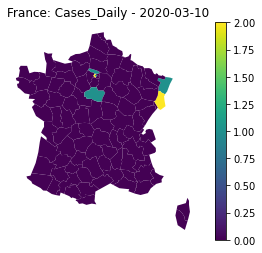

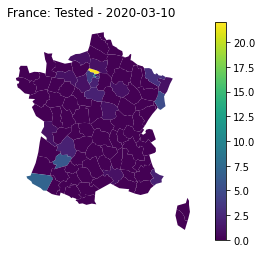

In [125]:
for i in ['cases_daily', 'tested']:
    d.plot(column = i, legend = True)
    plt.title(f'France: {i.title()} - 2020-03-10', loc = 'left')
    plt.axis('off')

In [126]:
aus.drop_duplicates('nuts3_id')

,date,nuts3_id,departement,cases_daily,tested,nuts3_name,population
0,2020-03-10,FR101,75,1,1,Paris,2125246
246,2020-03-10,FR102,77,0,0,Seine-et-Marne,1193767
492,2020-03-10,FR103,78,0,4,Yvelines,1354304
738,2020-03-10,FR104,91,0,2,Essonne,1134238
984,2020-03-10,FR105,92,2,10,Hauts-de-Seine,1428881
...,...,...,...,...,...,...,...
22386,2020-03-10,FRL04,13,0,0,Bouches-du-Rhône,1835719
22632,2020-03-10,FRL05,83,0,0,Var,898441
22878,2020-03-10,FRL06,84,0,0,Vaucluse,499685
23124,2020-03-10,FRM01,2A,0,0,Corse-du-Sud,118593


In [39]:
two = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level2.shp')
three = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level3.shp')

,id,name,geometry
0,AT111,Mittelburgenland,"POLYGON ((4819333.155 2742338.365, 4824015.359..."
1,AT112,Nordburgenland,"POLYGON ((4819333.155 2742338.365, 4806424.917..."
2,AT113,Südburgenland,"POLYGON ((4808359.665 2711253.177, 4813349.845..."
3,AT121,Mostviertel-Eisenwurzen,"POLYGON ((4729814.680 2813889.571, 4730465.875..."
4,AT122,Niederösterreich-Süd,"POLYGON ((4762433.452 2790112.300, 4772972.088..."
...,...,...,...
1391,UKN08,"Newry, Mourne and Down","POLYGON ((3327914.990 3611340.904, 3333397.300..."
1392,UKN13,Antrim and Newtownabbey,"POLYGON ((3272083.243 3639871.912, 3302970.692..."
1393,UKN14,Lisburn and Castlereagh,"POLYGON ((3320044.876 3613746.657, 3324115.579..."
1394,UKN07,"Armagh City, Banbridge and Craigavon","POLYGON ((3289545.357 3588787.855, 3279162.585..."
